In [1]:
!pip install pandas scikit-learn


In [ ]:
#Aryan Gahlaut(2K22/CO/102)
#Ayush(2K22/CO/120)
#Ayush Grover(2K22/CO/125)
#Ashwani Kumar(2K22/CO/113)

In [5]:
from sklearn.preprocessing import StandardScaler
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.tree import plot_tree

In [9]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

x = df.drop("medv", axis=1)
y = df["medv"]

In [11]:
# Data Preprocessing

print("Missing values in each feature:\n", x.isnull().sum())          # missing value
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = x[col].fillna(x[col].mode()[0])
    else:
        x[col] = x[col].fillna(x[col].mean())

# Just in case target has missing values (unlikely)
y = y.fillna(y.mean())

# Ensure numeric types
x = x.astype(float)
y = y.astype(float)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit on training data and transform both training and test data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Missing values in each feature:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64


Linear Regression Model:
Mean Squared Error: 24.291119474973513
R² Score: 66.8759493535632



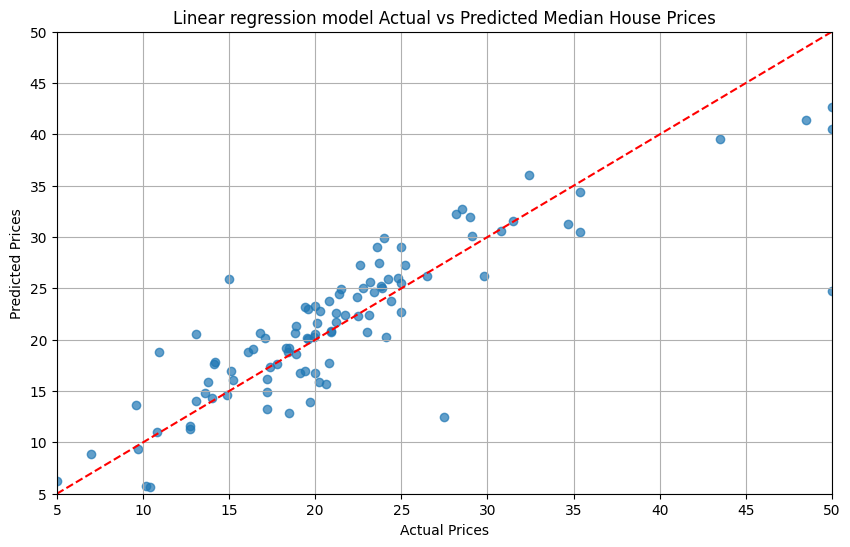

In [12]:
# Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions and evaluation for Linear Regression
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model:")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2*100}\n")

# Linear Regression graph

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line for perfect predictions
plt.title("Linear regression model Actual vs Predicted Median House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.grid()
plt.show()

Random Forest Model:
Mean Squared Error: 7.912745333333333
R² Score: 89.20995891343227


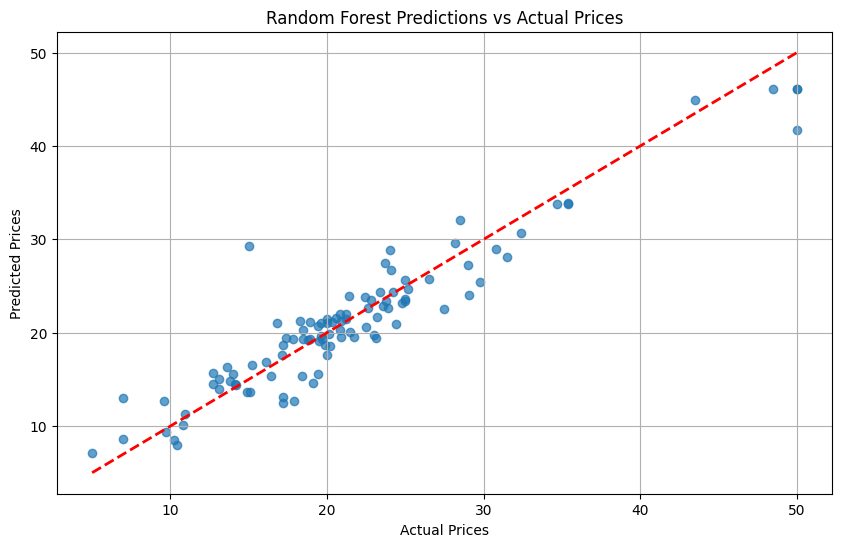

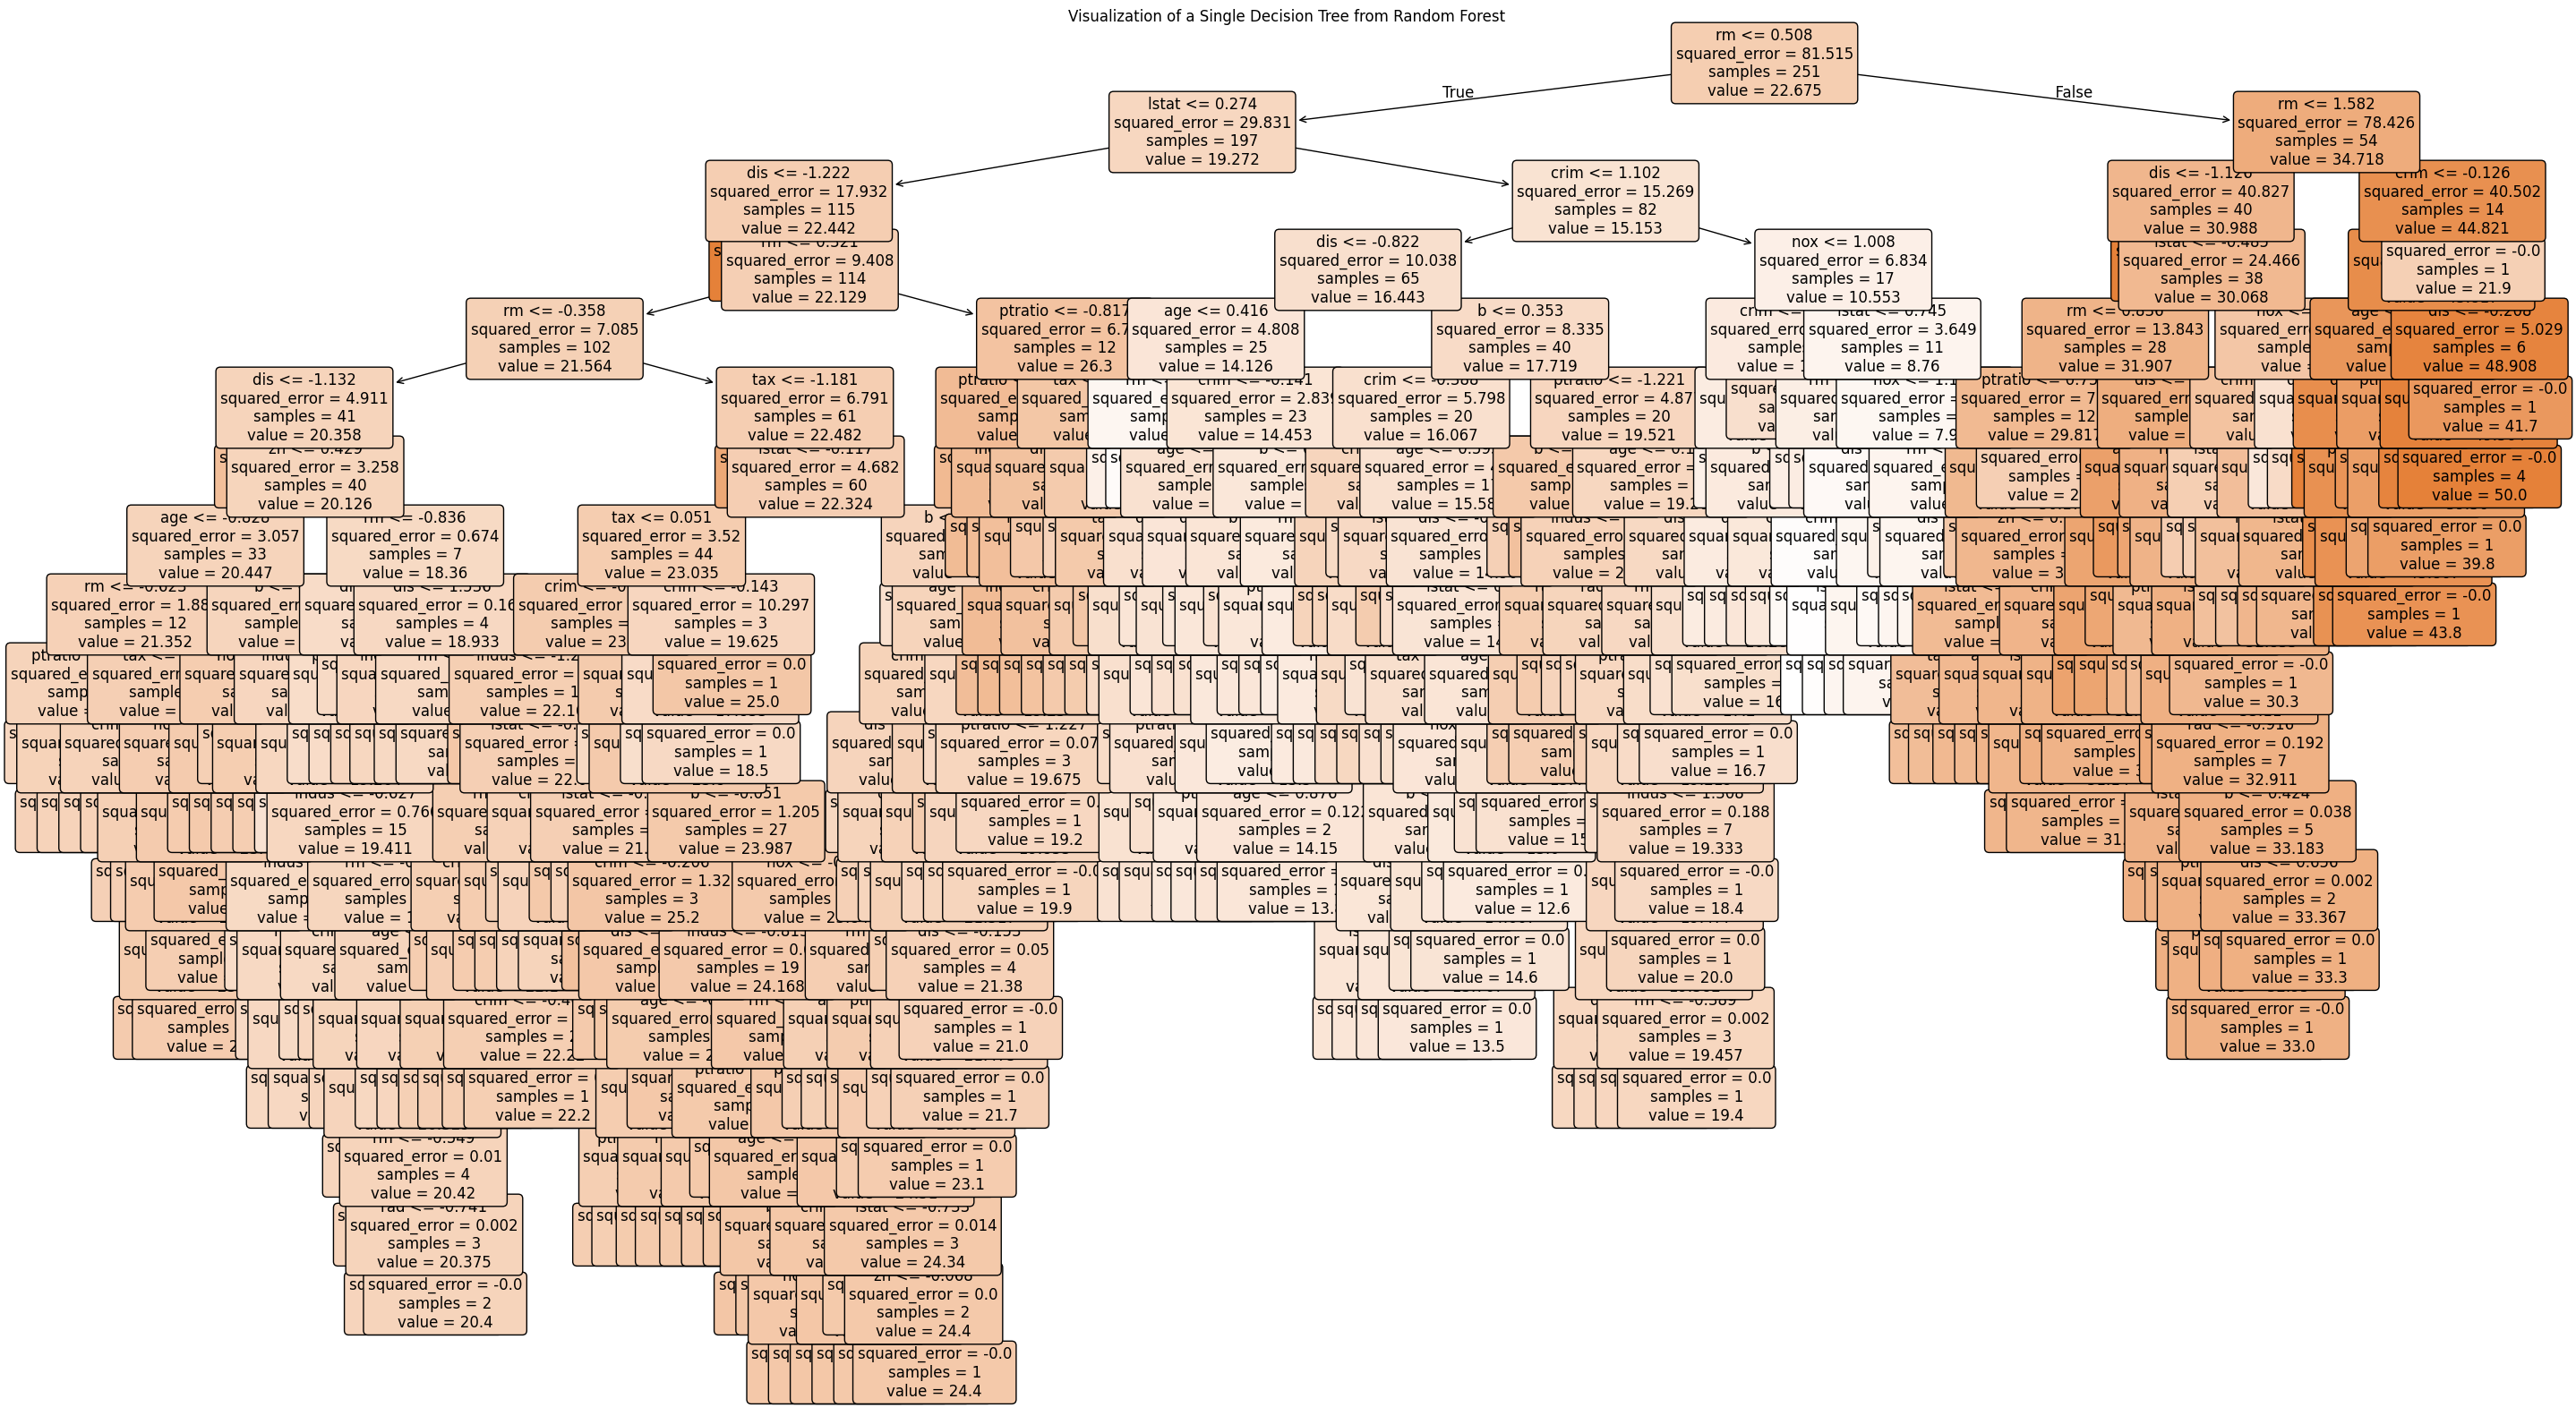

In [13]:
# Random Forest Model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(x_train, y_train)

# Predictions and evaluation for Random Forest
y_pred_rf = random_forest_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R² Score: {r2_rf*100}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)  # Line for perfect prediction
plt.title("Random Forest Predictions vs Actual Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.show()

plt.figure(figsize=(35, 20))
plot_tree(random_forest_model.estimators_[0],
          feature_names=x.columns,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Visualization of a Single Decision Tree from Random Forest")
plt.show()




In [14]:
import joblib

# Save models
joblib.dump(model, 'linear_model.pkl')
joblib.dump(random_forest_model, 'rf_model.pkl')


['rf_model.pkl']